### Juan Pablo Fonseca Correa - 138263

In [13]:
# importar librerías y leer la base de datos
import pandas as pd
import numpy as np
from scipy import sparse
from sys import maxint
from math import pow
from __future__ import division
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('reglin.csv') # leo la bd 

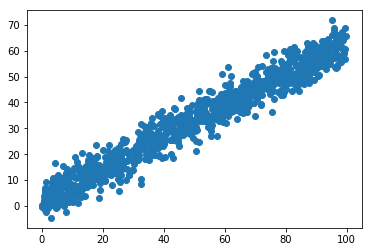

In [4]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [6]:
# separar en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

In [7]:
re = linear_model.LinearRegression()
re.fit(X_train,Y_train)
Y_predict = re.predict(X_test)

In [8]:
# Muestro las w's
print 'Pendiente: \n', re.coef_[0] # w1
print 'Ordenada al origen: \n', re.intercept_ # w0

Pendiente: 
0.60563966033
Ordenada al origen: 
2.58114165236


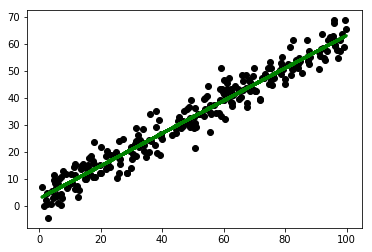

In [9]:
# Para la gráfica
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_predict, color='green', linewidth=3)
plt.show()

In [30]:
# ERROR USANDO EL TEST. Así ves qué tan bien se comporta tu modelo con respecto al test
# def error(w0, w1):
#     y = w0 + w1*X_test
#     errores = [pow(y.values[i][0]-Y_test.values[i],2) for i in range(0,len(Y_test.values))]
#     error = sum(errores)
#     return error

# ERROR USANDO EL TRAIN. Aquí sí se ve que JUSTO le pega al mínimo
def error(w0, w1):
    # ojo: uso el test para ver qué tan bien aproxima al mínimo del error del TEST
    # pero igual también deberías hacerlo con el train para ver que esa sí JUSTO le pega al mínimo
    y = w0 + w1*X_train
    errores = [pow(y.values[i][0]-Y_train.values[i],2) for i in range(0,len(Y_train.values))]
    error = sum(errores)
    return error

In [31]:
# x = np.linspace(2.482, 2.483, 41, endpoint=True)
# y = np.linspace(0.606, 0.608, 41, endpoint=True)

x = np.linspace(2, 3.5, 41, endpoint=True) # w0
y = np.linspace(0, 2, 41, endpoint=True) # w1
z = [[error(i,j) for i in x] for j in y]

El error que da el método es 13371.5353827


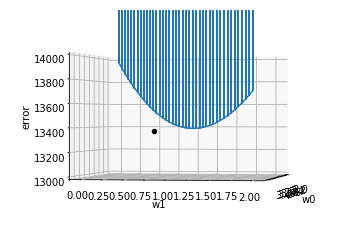

Parece que no encuentra completamente bien el mínimo (pero está cerca)


In [32]:

# GRAFICAR EL ERROR EN 3D
print "El error que da el método es {0}".format(error(re.intercept_,re.coef_[0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(x,y,z)
ax.set_zlim(13000, 14000)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('error')
ax.scatter(re.intercept_,re.coef_[0],error(re.intercept_,re.coef_[0]),color='black')
ax.view_init(0, 10)
plt.show()
print "Parece que no encuentra completamente bien el mínimo (pero está cerca)"

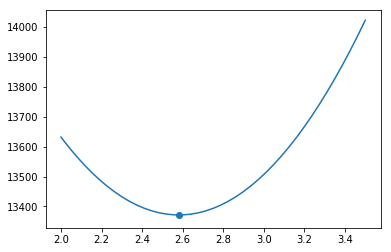

In [33]:
# graficar el error, dejando fijo w0
z1 = [error(i,re.coef_[0]) for i in x]
plt.plot(x,z1)
plt.scatter(re.intercept_,error(re.intercept_,re.coef_[0]))
plt.show()

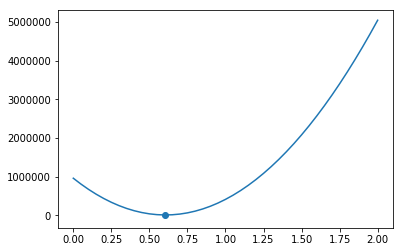

In [34]:
# graficar el error, dejando fijo w1
z2 = [error(re.intercept_,j) for j in y]
plt.plot(y,z2)
plt.scatter(re.coef_[0],error(re.intercept_,re.coef_[0]))
plt.show()

#### efectivamente se puede ver que las w0 y w1 sí son el mínimo